In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(x_train,y_train) ,(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

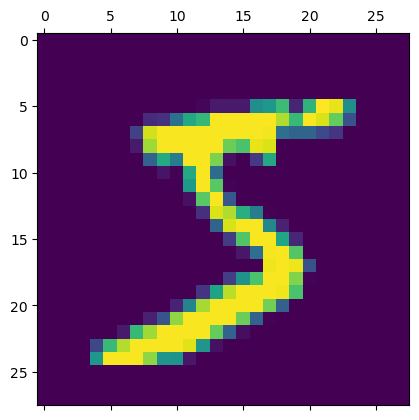

In [6]:
plt.matshow(x_train[0])

In [7]:
y_train[0]

5

In [17]:
x_train = x_train/ 255
x_test = x_test/255

In [8]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train_flatten = x_train.reshape(len(x_train),28*28)
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [10]:
### model building

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8173 - loss: 0.7121
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9141 - loss: 0.3067
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.9213 - loss: 0.2794
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.9228 - loss: 0.2739
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 902us/step - accuracy: 0.9258 - loss: 0.2633


In [21]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - accuracy: 0.9146 - loss: 0.3057


[0.2692790925502777, 0.9257000088691711]

In [22]:
y_predicted = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


In [23]:
y_predicted[0]

array([2.08958536e-02, 5.26388533e-07, 6.81667998e-02, 9.58744764e-01,
       2.24168389e-03, 1.07023075e-01, 1.16459660e-06, 9.99841630e-01,
       1.14066973e-01, 6.40166640e-01], dtype=float32)

In [27]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [24]:
np.argmax(y_predicted[0])

7

In [29]:
cm=tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

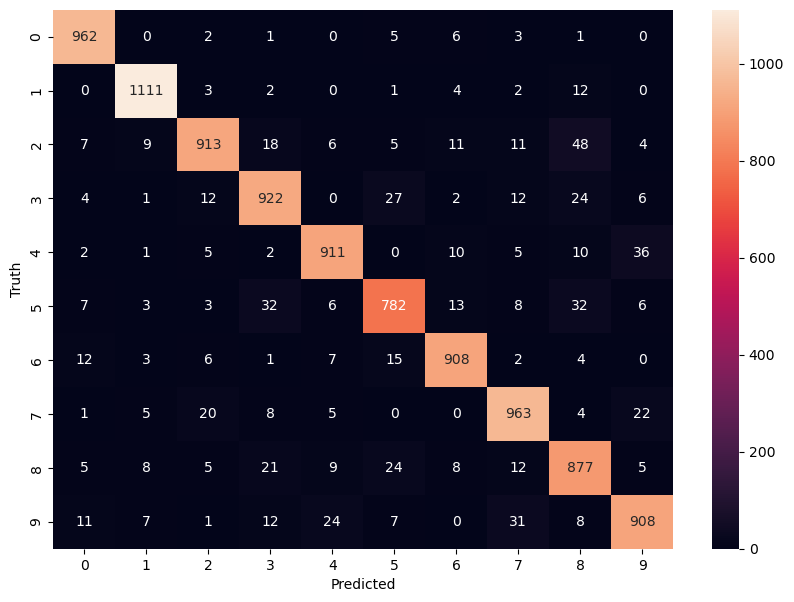

In [30]:
import seaborn as sns
plt.figure(figsize =(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
# Adding hidden Layer
model_hidden = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model_hidden.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_hidden.fit(x_train_flatten,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8753 - loss: 0.4482
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9617 - loss: 0.1284
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9751 - loss: 0.0846
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9822 - loss: 0.0595
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9862 - loss: 0.0476


In [36]:
model_hidden.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9712 - loss: 0.0942


[0.07763037830591202, 0.9750999808311462]

In [41]:
y_predicted = model_hidden.predict(x_test.reshape(-1, 784))  # Flatten test images
y_predicted_labels = np.argmax(y_predicted, axis=1)    

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step


In [42]:

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)


In [43]:
cm_numpy = cm.numpy()

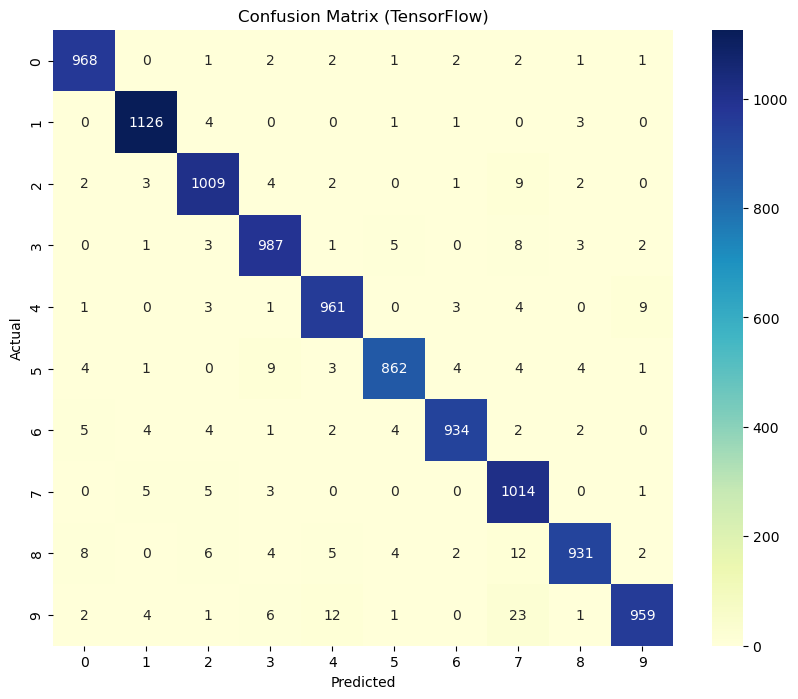

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_numpy, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (TensorFlow)')
plt.show()